# MA934 - class 2

## Deadline: 12:00 noon 10 October 2019

You should make at least one commit to your repository per computational task below - usually more.

For this assignment, you must create a new module called MA934Sorting.jl (or something similar) to contain the implementations that you write.


## Task 1 - insertion sort

Add an implementation of the insertion sort algorithm to your module. Check that it works by sorting some manageably small lists of random integers. The command rand(1:200, 10) creates a list of 10 random intergers in the range 1:200.

## Task 2 - mergesort

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:

```Julia
    function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end
```

Add this function to your module and use it to implement the mergesort algorithm. Check that it works.

## Task 3 - fixing mergesort

You will probably find that your mergesort algorithm fails for moderately array lengths (on my laptop, I couldn't do arrays of length $2^{15}$ for example.) The reason for this is that there are too many recursions: the code quickly exceeds the maximum allowed recursion depth. To fix this, write a non-recursive implementation of the mergepresorted() function. Test your mergesort() function using the non-recursive version. It should work better.

## Task 4 - benchmarking

Measure the runtime of your insertion sort and mergesort functions for random arrays of integers in the range $2$ to $2^{20}$. Save your results to a file.

This is the potentially complicated part of this task. Here are some pointers:
* Use BenchmarkTools.jl to do the timing rather than the @timed macro. In my experience it works better. See https://github.com/JuliaCI/BenchmarkTools.jl
* Be careful if your algorithms run in-place: BenchmarkTools runs a function multiple times to get an average runtime. Your results will be non-representative if each of these runs ends up sorting an array that was already sorted by the first pass!
* A really useful package for reading and writing arrays (and other Julia types) to files is JLD.jl. I recommend that you use this. See : https://github.com/JuliaIO/JLD.jl

## Task 5 - empirical analysis of computational complexity

Load your benchmarking results back from the file and plot them on a log-log scale. Fit your data to determine how the computational cost scales with the length of the input array for large array sizes. How does this compare to theoretical expectations?

In [1]:
push!(LOAD_PATH,pwd())

4-element Array{String,1}:
 "@"                               
 "@v#.#"                           
 "@stdlib"                         
 "/home/asmith/class-2-adam96smith"

In [2]:
#Load all packages required for tasks
using Pkg
Pkg.add("Plots")
Pkg.add("BenchmarkTools")
Pkg.add("Statistics")
Pkg.add("JLD")
using MA934Sorting

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %>    ]  88.9 % Resolving package versions...
 Installed PlotUtils ─ v0.6.0
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [995b91a9] ↑ PlotUtils v0.5.8 ⇒ v0.6.0
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


┌ Info: Recompiling stale cache file /home/asmith/.julia/compiled/v1.0/MA934Sorting.ji for MA934Sorting [top-level]
└ @ Base loading.jl:1190


In [3]:
#Task 1
Iter_Sort(rand(1:200,10))

10-element Array{Int64,1}:
   2
   4
   5
  56
  72
 106
 145
 162
 172
 189

In [4]:
#Task 2
mergesort(rand(1:2^10,2^12))

4096-element Array{Int64,1}:
    1
    2
    2
    2
    2
    2
    2
    3
    3
    3
    3
    4
    4
    ⋮
 1021
 1021
 1022
 1022
 1022
 1023
 1023
 1023
 1023
 1023
 1023
 1024

In [5]:
#Task 3
Iter_mergesort(rand(1:2^20,2^20))

1048576-element Array{Int64,1}:
       1
       1
       1
       3
       3
       5
       5
       8
       8
       9
      11
      12
      12
       ⋮
 1048562
 1048564
 1048564
 1048567
 1048567
 1048569
 1048569
 1048571
 1048572
 1048572
 1048573
 1048576

In [33]:
using BenchmarkTools
using Statistics
using JLD

n = 18
ms = rand(n)
for i = 1:n
    ans = mean(@benchmark Iter_mergesort(rand(1:2^10,2^$i))).time
    ms[i] = ans
end

Is = rand(n)
for i = 1:n
    ans = mean(@benchmark Iter_Sort(rand(1:2^10,2^$i))).time
    Is[i] = ans
end

x_axis = rand(n)
for i = 1:n
    x_axis[i] = 2^i
end

save("SortingResults.jld", "InsertionSort", Is, "IterativeMergeSort", ms, "x_axis", x_axis, "N", N, "NSquared", NN)

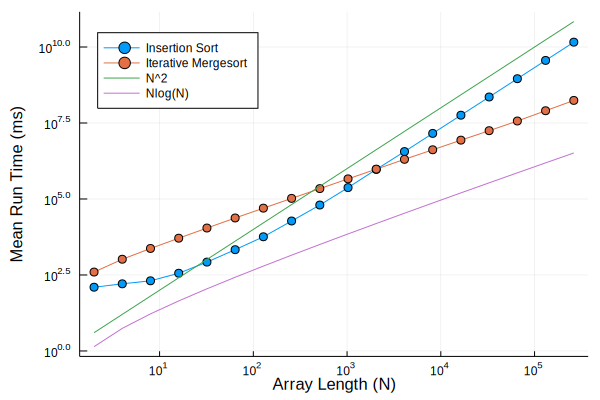

In [53]:
#Task 5
A = load("SortingResults.jld","InsertionSort")
B = load("SortingResults.jld","IterativeMergeSort")
X = load("SortingResults.jld","x_axis")
using Plots

n = 18 #Same n as cell above
N = rand(n) #Create array to plot nlog(n)
for i = 1:n
    if X[i]*log(X[i]) > 0
        N[i] = X[i]*log(X[i])
    else
        N[i] = 1
    end
    
end

NN = rand(n) #Create array to plot n^2
for i = 1:n
    NN[i] = X[i]^2
end

plot(X, A, markershape=:circle, label = "Insertion Sort",
    xaxis = :log, yaxis = :log, xlabel="Array Length (N)",
    ylabel="Mean Run Time (ms)", legend = :topleft)
plot!(X, B, xaxis = :log, markershape=:circle,
    yaxis = :log, label = "Iterative Mergesort")
#Plot theoretical computational costs, both comply
plot!(X, NN, xaxis = :log, yaxis = :log, label = "N^2")
plot!(X, N, xaxis = :log, yaxis = :log, label = "Nlog(N)")